In [157]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [158]:
tree_df = pd.read_csv('Tree_Inventory_20241009.csv')
tree_df

C:\Users\ruthv\AppData\Local\Temp\ipykernel_16172\2772770895.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  tree_df = pd.read_csv('Tree_Inventory_20241009.csv')


,Editing,Botanical Name,Common Name,DBH,Total Yearly Eco Benefits ($),Stormwater Benefits ($),Stormwater Gallons Saved,Greenhouse CO2 Benefits ($),CO2 Avoided (in lbs.),CO2 Sequestered (in lbs.),...,Street,Side,Site,Council District,Park Name,Latitude,Longitude,Site ID,Location,location
0,Buffalo,VACANT,VACANT,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,Wright Av,Front,1,University,0,42.927148,-78.799769,124973,"(42.92714807382628, -78.7997685057891)",POINT (-78.7997685057891 42.92714807382628)
1,Buffalo,0,0,2.0,0.00,0.00,0.00,0.00,0.00,0.00,...,Amherst St East,Front,1,University,0,42.942096,-78.824369,129981,"(42.942095601257506, -78.82436866034521)",POINT (-78.82436866034521 42.942095601257506)
2,Buffalo,VACANT,VACANT,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,Tyler St,In_Lot,1,University,0,42.952295,-78.828568,130517,"(42.95229549493709, -78.82856784534256)",POINT (-78.82856784534256 42.95229549493709)
3,Buffalo,VACANT,VACANT,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,Parkside Av,Front,1,University,0,42.952440,-78.836184,132325,"(42.9524401698, -78.8361837479)",POINT (-78.8361837479 42.9524401698)
4,Buffalo,unsuitable vacant,unsuitable vacant,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,Rounds Av,Front,1,University,0,42.947378,-78.804219,75908,"(42.9473782132, -78.804219387)",POINT (-78.804219387 42.9473782132)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133232,Olmsted,ACER SACCHARINUM,"MAPLE, SILVER",36.0,237.14,37.74,4716.94,2.38,497.27,341.92,...,Cazenovia St,In_Lot,1,South,Cazenovia,42.840782,-78.798027,95697,"(42.84078191983765, -78.79802694257309)",POINT (-78.79802694257309 42.84078191983765)
133233,Olmsted,VACANT,VACANT,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,Parkside Av,In_Lot,1,Delaware,Delaware,42.939590,-78.857250,99835,"(42.93959041738055, -78.85725005980078)",POINT (-78.85725005980078 42.93959041738055)
133234,Olmsted,PINUS NIGRA,"PINE, AUSTRIAN",18.0,91.24,5.99,748.92,0.08,20.46,5.73,...,Parkside Av,In_Lot,1,Delaware,Delaware,42.940473,-78.857378,99751,"(42.940473104240944, -78.85737772579341)",POINT (-78.85737772579341 42.940473104240944)
133235,Olmsted,VACANT,VACANT,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,Parkside Av,In_Lot,1,Delaware,Delaware,42.938083,-78.859502,99870,"(42.93808331608051, -78.85950164974676)",POINT (-78.85950164974676 42.93808331608051)


In [159]:
tree_df = tree_df.dropna()

for column in tree_df.columns:
        most_frequent_dtype = tree_df[column].map(type).mode()[0]
        tree_df = tree_df[tree_df[column].map(type) == most_frequent_dtype]



In [160]:
string_cols = []
for cols in tree_df.columns:
    if tree_df[cols].dtype == 'object':
        string_cols.append(cols)
tree_df[string_cols] = tree_df[string_cols].apply(lambda x: x.str.lower())
tree_df

,Editing,Botanical Name,Common Name,DBH,Total Yearly Eco Benefits ($),Stormwater Benefits ($),Stormwater Gallons Saved,Greenhouse CO2 Benefits ($),CO2 Avoided (in lbs.),CO2 Sequestered (in lbs.),...,Street,Side,Site,Council District,Park Name,Latitude,Longitude,Site ID,Location,location
0,buffalo,vacant,vacant,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,wright av,front,1,university,0,42.927148,-78.799769,124973,"(42.92714807382628, -78.7997685057891)",point (-78.7997685057891 42.92714807382628)
1,buffalo,0,0,2.0,0.00,0.00,0.00,0.00,0.00,0.00,...,amherst st east,front,1,university,0,42.942096,-78.824369,129981,"(42.942095601257506, -78.82436866034521)",point (-78.82436866034521 42.942095601257506)
2,buffalo,vacant,vacant,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,tyler st,in_lot,1,university,0,42.952295,-78.828568,130517,"(42.95229549493709, -78.82856784534256)",point (-78.82856784534256 42.95229549493709)
3,buffalo,vacant,vacant,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,parkside av,front,1,university,0,42.952440,-78.836184,132325,"(42.9524401698, -78.8361837479)",point (-78.8361837479 42.9524401698)
4,buffalo,unsuitable vacant,unsuitable vacant,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,rounds av,front,1,university,0,42.947378,-78.804219,75908,"(42.9473782132, -78.804219387)",point (-78.804219387 42.9473782132)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133232,olmsted,acer saccharinum,"maple, silver",36.0,237.14,37.74,4716.94,2.38,497.27,341.92,...,cazenovia st,in_lot,1,south,cazenovia,42.840782,-78.798027,95697,"(42.84078191983765, -78.79802694257309)",point (-78.79802694257309 42.84078191983765)
133233,olmsted,vacant,vacant,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,parkside av,in_lot,1,delaware,delaware,42.939590,-78.857250,99835,"(42.93959041738055, -78.85725005980078)",point (-78.85725005980078 42.93959041738055)
133234,olmsted,pinus nigra,"pine, austrian",18.0,91.24,5.99,748.92,0.08,20.46,5.73,...,parkside av,in_lot,1,delaware,delaware,42.940473,-78.857378,99751,"(42.940473104240944, -78.85737772579341)",point (-78.85737772579341 42.940473104240944)
133235,olmsted,vacant,vacant,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,parkside av,in_lot,1,delaware,delaware,42.938083,-78.859502,99870,"(42.93808331608051, -78.85950164974676)",point (-78.85950164974676 42.93808331608051)


In [161]:
Q1 = tree_df.select_dtypes(include='number').quantile(0.25)
Q3 = tree_df.select_dtypes(include='number').quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = pd.DataFrame(False, index=tree_df.index, columns=tree_df.columns)
for column in tree_df.select_dtypes(include='number').columns:
    outliers[column] = (tree_df[column] < lower_bound[column]) | (tree_df[column] > upper_bound[column])
for column in tree_df.select_dtypes(include='number').columns:
    tree_df[column] = tree_df[column].where(~outliers[column], tree_df[column].median())
tree_df = tree_df.drop('location', axis=1)
print("Tree Inventory Data \n", tree_df.describe())

Tree Inventory Data 
                 DBH  Total Yearly Eco Benefits ($)  Stormwater Benefits ($)  \
count  67700.000000                   67700.000000             67700.000000   
mean       7.147293                      59.685102                 1.930983   
std        8.937849                      72.711756                 3.177354   
min      -10.000000                       0.000000                 0.000000   
25%        0.000000                       0.000000                 0.000000   
50%        3.000000                      29.310000                 0.490000   
75%       13.000000                     104.160000                 2.550000   
max       35.000000                     277.990000                13.460000   

       Stormwater Gallons Saved  Greenhouse CO2 Benefits ($)  \
count              67700.000000                 67700.000000   
mean                 241.346250                     0.045828   
std                  397.192988                     0.085640   
min       

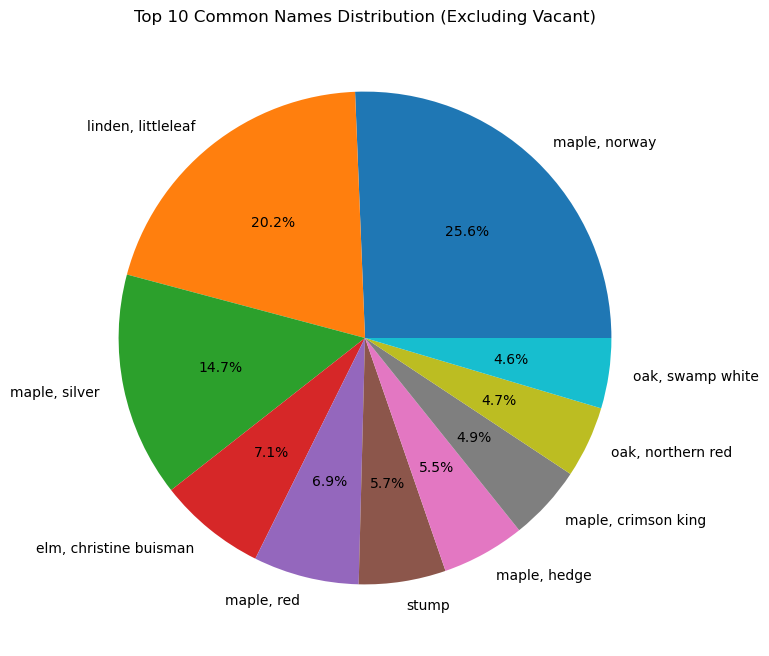

In [162]:
tree_df_cleaned = tree_df[tree_df['Common Name'] != 'vacant']
top_common_names = tree_df_cleaned['Common Name'].value_counts().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(top_common_names, labels=top_common_names.index, autopct='%1.1f%%')
plt.title('Top 10 Common Names Distribution (Excluding Vacant)')
plt.show()

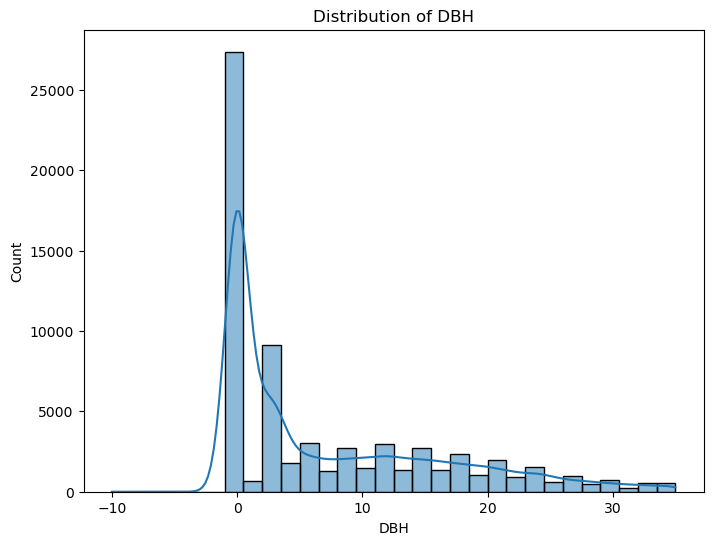

In [163]:
plt.figure(figsize=(8, 6))
sns.histplot(tree_df['DBH'], bins=30, kde=True)
plt.title('Distribution of DBH')
plt.show()


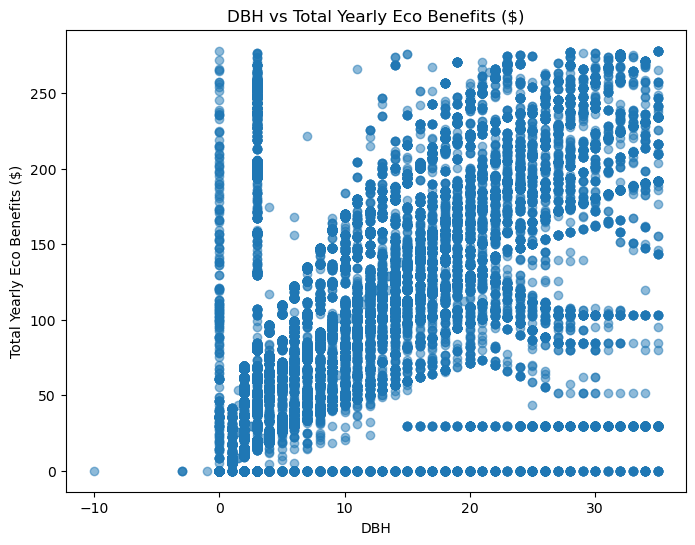

In [164]:
# Scatter plot for DBH vs Total Yearly Eco Benefits
plt.figure(figsize=(8, 6))
plt.scatter(tree_df['DBH'], tree_df['Total Yearly Eco Benefits ($)'], alpha=0.5)
plt.title('DBH vs Total Yearly Eco Benefits ($)')
plt.xlabel('DBH')
plt.ylabel('Total Yearly Eco Benefits ($)')
plt.show()

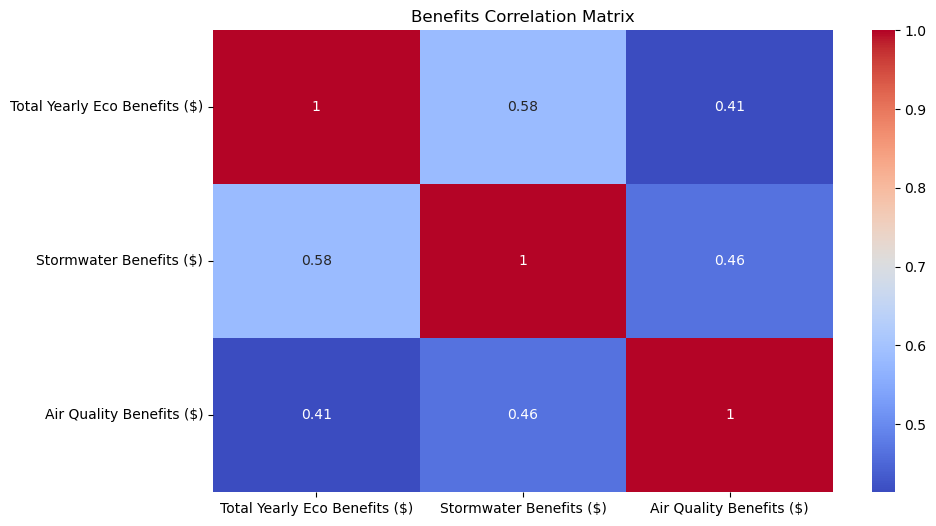

In [165]:
benefits_columns = ['Total Yearly Eco Benefits ($)', 'Stormwater Benefits ($)', 'Air Quality Benefits ($)']
benefits_matrix = tree_df[benefits_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(benefits_matrix, annot=True, cmap='coolwarm')
plt.title('Benefits Correlation Matrix')
plt.show()

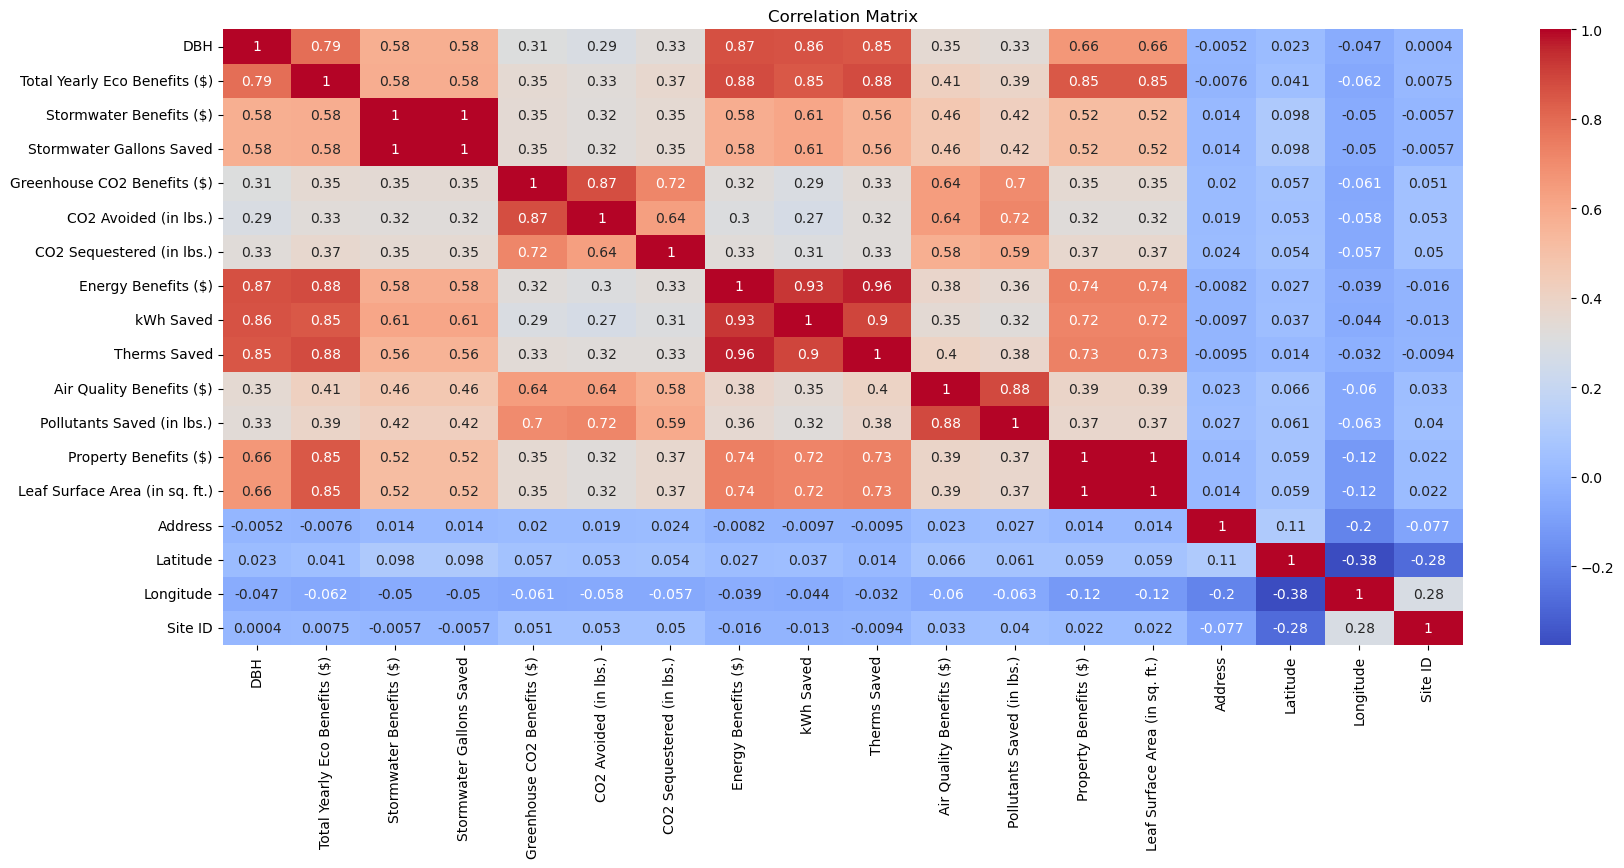

In [166]:
numeric_df = tree_df.select_dtypes(include=['number']).drop(columns=['Site'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [167]:
tree_df.columns

Index(['Editing', 'Botanical Name', 'Common Name', 'DBH',
       'Total Yearly Eco Benefits ($)', 'Stormwater Benefits ($)',
       'Stormwater Gallons Saved', 'Greenhouse CO2 Benefits ($)',
       'CO2 Avoided (in lbs.)', 'CO2 Sequestered (in lbs.)',
       'Energy Benefits ($)', 'kWh Saved', 'Therms Saved',
       'Air Quality Benefits ($)', 'Pollutants Saved (in lbs.)',
       'Property Benefits ($)', 'Leaf Surface Area (in sq. ft.)', 'Address',
       'Street', 'Side', 'Site', 'Council District', 'Park Name', 'Latitude',
       'Longitude', 'Site ID', 'Location'],
      dtype='object')

In [168]:
columns_to_exclude = ['Street', 'Location', 'Park Name', 'Latitude', 'Longitude', 'Site ID']
tree_df_filtered = tree_df.drop(columns=columns_to_exclude)
tree_df_encoded = pd.get_dummies(tree_df_filtered, columns=['Editing', 'Botanical Name', 'Common Name', 'Side', 'Council District'], drop_first=True)
correlation_matrix = tree_df_encoded.corr()
benefits_correlations = correlation_matrix['Total Yearly Eco Benefits ($)'].sort_values(ascending=False)
print("Correlations of features with Total Yearly Eco Benefits ($):")
print(benefits_correlations)
threshold = 0.1
low_correlation_features = benefits_correlations[benefits_correlations.abs() < threshold].index.tolist()

print(f"Features having low correlation with Total Yearly Eco Benefits ($): {low_correlation_features}")
tree_df_encoded = tree_df_encoded.drop(columns=low_correlation_features)


Correlations of features with Total Yearly Eco Benefits ($):
Total Yearly Eco Benefits ($)     1.000000
Therms Saved                      0.879391
Energy Benefits ($)               0.878924
kWh Saved                         0.849116
Leaf Surface Area (in sq. ft.)    0.847521
                                    ...   
Common Name_stump                -0.078523
Council District_ellicott        -0.090780
Common Name_vacant               -0.665892
Botanical Name_vacant            -0.665892
Site                                   NaN
Name: Total Yearly Eco Benefits ($), Length: 648, dtype: float64
Features having low correlation with Total Yearly Eco Benefits ($): ['Botanical Name_pyrus calleryana', 'Common Name_pear, callery', 'Botanical Name_populus deltoides', 'Common Name_cottonwood, eastern', "Botanical Name_acer platanoides 'crimson king'", 'Common Name_maple, crimson king', 'Side_in_lot', 'Common Name_horsechestnut, common', 'Botanical Name_aesculus hippocastanum', 'Common Name_london

In [169]:
non_categorical_columns = tree_df_encoded.select_dtypes(include=['number']).columns.tolist()
min_values = tree_df_encoded[non_categorical_columns].min()
max_values = tree_df_encoded[non_categorical_columns].max()
tree_df_encoded[non_categorical_columns] = (tree_df_encoded[non_categorical_columns] - min_values) / (max_values - min_values)
tree_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67700 entries, 0 to 133236
Data columns (total 30 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   DBH                                                    67700 non-null  float64
 1   Total Yearly Eco Benefits ($)                          67700 non-null  float64
 2   Stormwater Benefits ($)                                67700 non-null  float64
 3   Stormwater Gallons Saved                               67700 non-null  float64
 4   Greenhouse CO2 Benefits ($)                            67700 non-null  float64
 5   CO2 Avoided (in lbs.)                                  67700 non-null  float64
 6   CO2 Sequestered (in lbs.)                              67700 non-null  float64
 7   Energy Benefits ($)                                    67700 non-null  float64
 8   kWh Saved                                         